## COM410 - Aprendizado de Máquinas - Semana 5
### Tutorial da videoaula 13: Aplicação do algoritmo Fuzzy C-Means


Nesta aula, faremos uma tarefa de agrupamento com o algoritmo Fuzzy C-Means. Vamos usar o mesmo conjunto de dados da semana 4, que contém sobre pessoas que realizaram compras a partir de propagandas nas suas redes sociais. Para rodar o algoritmo o Fuzzy C-Means, iremos usar principamente as bibliotecas scikit-fuzzy e Pandas, além da scikit-learn para normalização de dados e avaliação. 

Sobre o Google Colab, recomendamos que, se necessário, reveja a videoaula Jupyter Notebook e Colab Google, videoaula 4 do curso COM350 - Introdução à Ciência de Dados (https://youtu.be/ZC8bfSZLl80) ou acesse a ferramenta no site https://colab.research.google.com/. Caso não tenha uma conta Google ou não queira usar, pode fazer também no Jupyter Notebook. 

A base de dados contém os seguintes campos:  

#### Compras em redes sociais

- **Age**: idade (em anos)
- **EstimatedSalary**: salário estimado (anual, em dólares)
Atributo classe:
- **Purchased**: comprado (1 - sim, 0 - não)

#### URL original do conjunto de dados
https://github.com/mk-gurucharan/Classification/blob/master/SocialNetworkAds.csv

Fonte: **Machine Learning Basics: Support Vector Machine (SVM) Classification**|. Gurucharan M. K., Towards Data Science.

URL: https://towardsdatascience.com/machine-learning-basics-support-vector-machine-svm-classification-205ecd28a09d

1. Nesta atividade, usaremos as bibliotecas **scikit-fuzzy**, **scikit-learn**, **pandas** e **matplotlib**. Mas antes de importar as  bibliotecas, será necessário instalar a biblioteca **scikit-fuzzy**.

In [1]:
!pip install scikit-fuzzy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=51db23aab06431776d4b797e3f26f150801692d3ae5a5cd796c5079a80221118
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fz
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

plt.rcParams.update({'figure.figsize':[15,10]})
plt.rcParams.update({'font.size': 18})

2. Importe a base de dados direto da URL e verifique as primeiras linhas. O arquivo contém 400 registros. 

In [3]:
url = 'https://github.com/higoramario/univesp-com410-aprendizado-de-maquinas/raw/main/social-network-ads.csv'
compras = pd.read_csv(url, sep=',')
compras.head(10)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


3. Vamos olhar a distribuição espacial dos dados

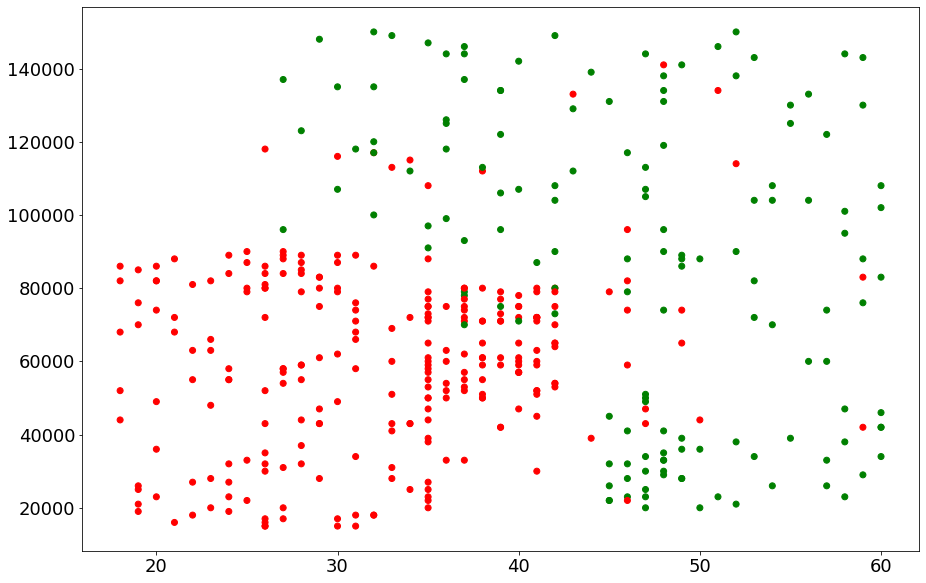

In [4]:
fig, ax = plt.subplots()
colors = {0:'red', 1:'green'}
ax.scatter(compras['Age'], compras['EstimatedSalary'], c=compras['Purchased'].map(colors))
plt.show()

4.  Por enquanto vamos usar apenas os atributos, já que não faremos nenhum treinamento. Vamos separar os atributos das suas classes.

In [5]:
compras_atributos = compras[['Age','EstimatedSalary']]
compras_classes = compras['Purchased']

5. Em seguida, vamos normalizar os dados para diminuir o espaço de busca, compactando melhor os dados antes de rodar o algoritmo.

In [6]:
scaler = StandardScaler()
compras_atributos = scaler.fit_transform(compras_atributos)

6. Agora vamos fazer o agrupamento usando o Fuzzy C-Means. O algoritmo possui vários parâmetros de configuração:

  **data**: recebe os dados. Aqui é necessário transpor os dados do array (**compras_atributos.T**) para que os objetos fiquem em colunas.

  **c**: número de clusters

  **m**: parâmetro de distância entre membros de um mesmo cluster (quanto maior, maior a chance de um objeto distante pertencer a um cluster). Valor deve ser maior que 1.

  **error**: critério de parada de erro máximo de **m**

  **metric**: métrica de distância usada (padrão é distância euclidiana)

  **maxiter**: número máximo de iterações

  **init**: partição inicial do espaço (o padrão é aleatório)

  A saída do algoritmo traz uma linha para cada cluster, contendo o grau de pertinência de cada objeto um dado cluster.

  Mais detalhes podem ser vistos na documentação oficial: https://scikit-fuzzy.github.io/scikit-fuzzy/api/index.html

In [7]:
agrupamento = fz.cmeans(data=compras_atributos.T, c = 2, m = 2, error=0.005, maxiter=1000)

7. Os valores do grau de pertinência dos objetos estão em um array na segunda posição da tupla **agrupamento**

In [8]:
grau_pertinencia = agrupamento[1]

8. O array **grau_pertinencia** contém em cada linha, o percentual a qual os objetos pertencem em relação a cada cluster.

In [9]:
grau_pertinencia.shape

(2, 400)

9. Por exemplo, vamos ver o grau de pertinência do primeiro objeto para os 2 clusters

In [10]:
grau_pertinencia[0][0]

0.7936493538873289

In [11]:
grau_pertinencia[1][0]

0.206350646112671

10. Agora vamos olhar a distribuição dos objetos entre os dois clusters. Para isso, vamos usar a função **argmin** para retornar a posição do menor valor de pertinência de cada objeto em linha (axis=0).  

  Isso vai separar os objetos que pertencem a cada cluster somente pelo grau de pertinência de forma rígida, seja ele (0.51 ou 1.0).

  O valor armazenado em **clusters** é o índice de menor pertinência de cada objeto.


In [12]:
clusters = grau_pertinencia.argmin(axis=0)

In [13]:
clusters

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,

11. Com isso, vamos plotar o resultado do agrupamento

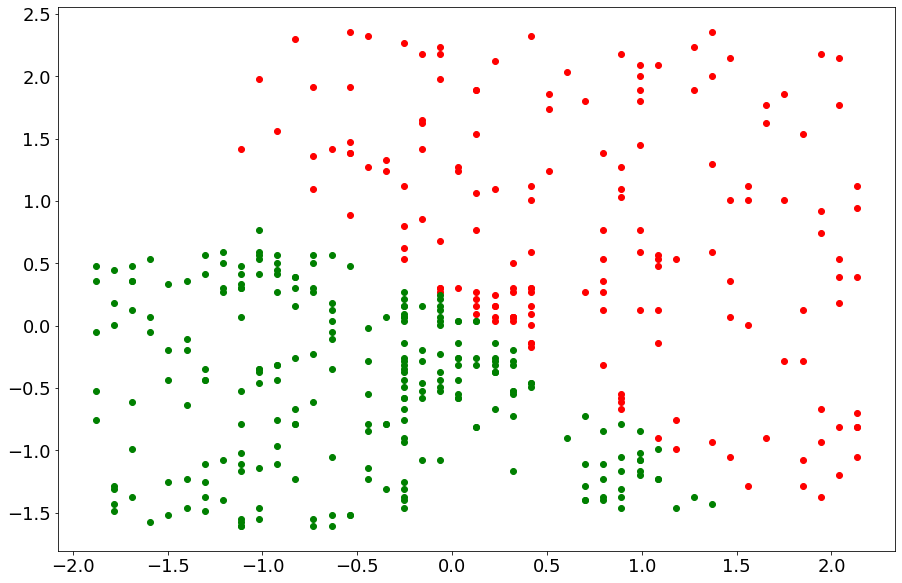

In [14]:
plt.scatter(compras_atributos[clusters == 0, 0], compras_atributos[clusters == 0, 1], c = 'red')
plt.scatter(compras_atributos[clusters == 1, 0], compras_atributos[clusters == 1, 1], c = 'green')
plt.show()

12. Vemos que o resultado ficou parecido com a distribuição previamente conhecida dos dados (que nesse caso particular possuem rótulos que nos permitem compará-los).

  Como temos esse rótulos, é possível também verificar a acurácia de agrupamento. Vamos ver qual é. 

  Obs. Lembrando que no agrupamento geralmente não sabemos as classes, e então usamos outras medidas, entre elas o índice de Dunn, ou o método de Elbow, que serão abordadas em breve na semana 7.

In [15]:
acuracia = accuracy_score(compras_classes.array,clusters)
print('Acurácia de agrupamento: {}'.format(round(acuracia,3)*100)+'%')

Acurácia de agrupamento: 19.0%


13. Uma das vantagens do uso de técnicas baseadas em lógica fuzzy é poder adicionar um grau de incerteza aos resultados. 
Podemos, por exemplo, usar um valor de corte para determinar que o grau de pertinência de certos objetos faça com que eles possam pertencem a mais de um cluster.

  Para isso, vamos primeiro gerar um array **fuzzy** com os maiores valores de pertinência de cada objeto para depois usar na hora plotar os resultados.

In [16]:
fuzzy = np.amax(grau_pertinencia,axis=0)

14. Vamos plotar os resultados adicionando um valor de corte para determinar quais são os objetos que poderiam pertencer a ambos clusters, usando uma cor diferente para tais objetos.

  Assim, destacamos os objetos cujo grau de pertinência for igual ou menor ao valor de corte.

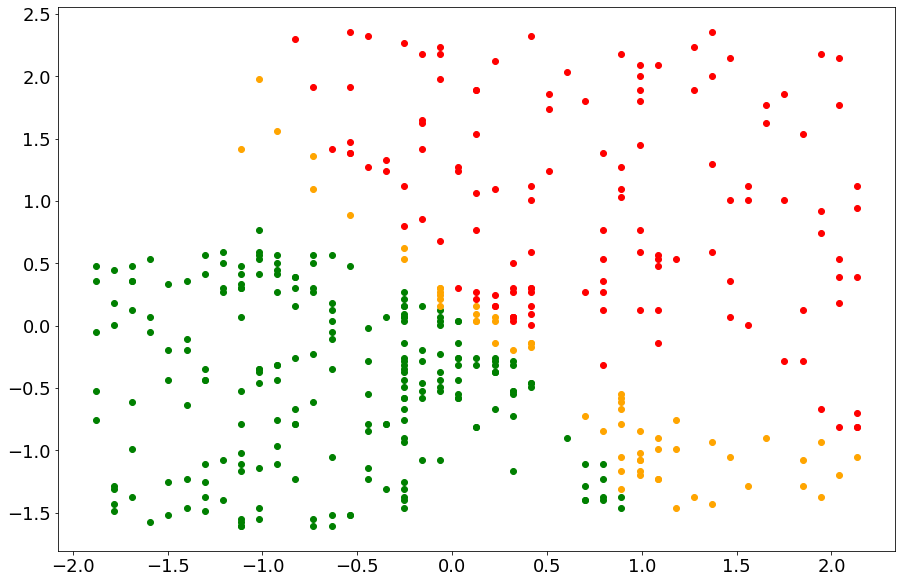

In [17]:
cores = ['red','green','orange']
corte = 0.6

for i, classe in enumerate(clusters):
  if fuzzy[i] >= corte:
    plt.scatter(compras_atributos[i,0], compras_atributos[i,1], color=cores[classe])
  else:
    plt.scatter(compras_atributos[i,0], compras_atributos[i,1], color=cores[len(cores)-1])

plt.show()

Podemos ver que, visualmente, que os resultados ficaram parecidos com a distribuição original dos dados. Fica claro que algoritmos baseados em erro quadrático, como o Fuzzy C-Means, não conseguem identificar bem outliers (aqueles que estão no meio da classe a que não pertencem), embora consigam apontar uma região de grande concentração de objetos similares.

Usando o valor de corte, vemos a fronteira de objetos com menor grau de pertinência entre os dois clusters.

Experimente ver se consegue obter melhores resultados mexendo nos parâmetros do algoritmo, usando outros valores de corte. Aplique o Fuzzy C-Means em outros conjuntos de dados.

**Versões das bibliotecas**

Esse tutorial está usando as seguintes versões de bibliotecas: 

matplotlib==3.2.2

numpy==1.21.6

pandas==1.3.5

scikit-learn==1.0.2

scikit-fuzzy==0.4.2